In [1]:
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom
import os

## Path

In [2]:
dir_name = "data"
img_name = "shaco.jpg"
img_path = os.path.join(dir_name, img_name)

In [3]:
#Image path
print(f"Image path: {img_path}")

Image path: data\shaco.jpg


## Image inspect

In [4]:
def img_inspect(img):
    # File info
    print("Image shape: ", img.shape)
    print("Image data type: ", img.dtype)
    print("Image min value: ", img.min())
    print("Image max value: ", img.max())

    # Plot the image
    io.imshow(img)
    plt.axis('off')
    io.show()

Image shape:  (717, 1215, 3)
Image data type:  uint8
Image min value:  0
Image max value:  255


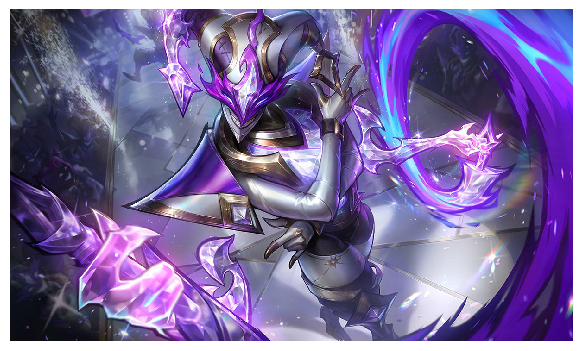

In [5]:
img = io.imread(img_path, as_gray=False, pilmode="RGB")
img_inspect(img)


## Image resize

Image shape:  (179, 304, 3)
Image data type:  float64
Image min value:  0.006218686961712816
Image max value:  0.9999509183560356


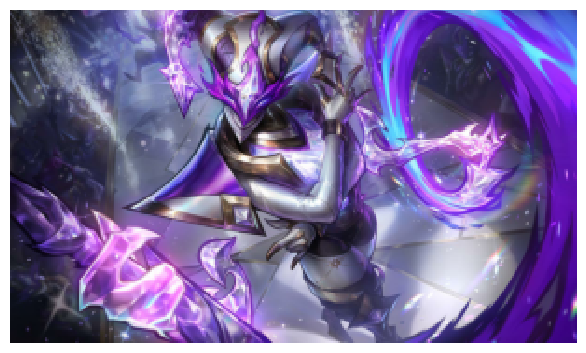

In [6]:
img_rescaled = rescale(img, 0.25, anti_aliasing=True,
                         channel_axis=2)

img_inspect(img_rescaled)

Image shape:  (179, 202, 3)
Image data type:  float64
Image min value:  0.0073853730754197666
Image max value:  0.9995832589733546


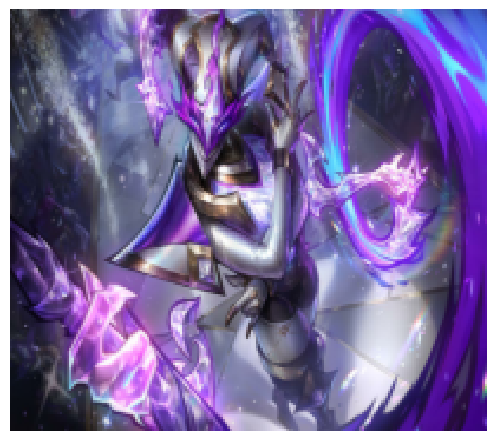

In [7]:
image_resized = resize(img, (img.shape[0] // 4,
                       img.shape[1] // 6),
                       anti_aliasing=True)

img_inspect(image_resized)

Image shape:  (179, 400, 3)
Image data type:  float64
Image min value:  0.004585048382680833
Image max value:  0.9999962389869093


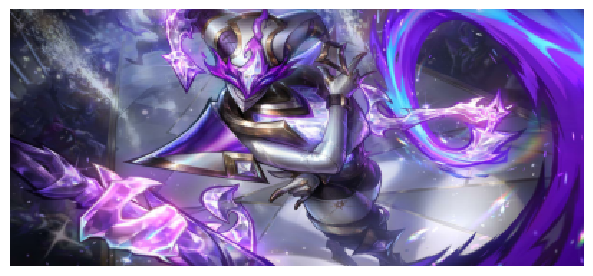

In [8]:
image_resized = resize(img, (img.shape[0] // 4,
                       400),
                       anti_aliasing=True)

img_inspect(image_resized)

In [9]:
im_gray = color.rgb2gray(img)
im_byte = img_as_ubyte(im_gray)


Image shape:  (717, 1215)
Image data type:  uint8
Image min value:  0
Image max value:  255


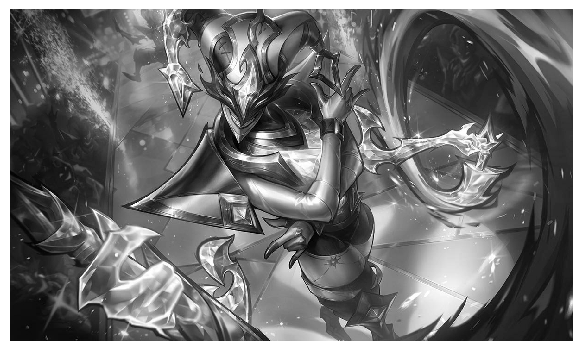

In [12]:
img_inspect(im_byte)

Max frequency: 8756.0
Max frequency bin: 41
Bin left: 40.83984375
Bin right: 41.8359375


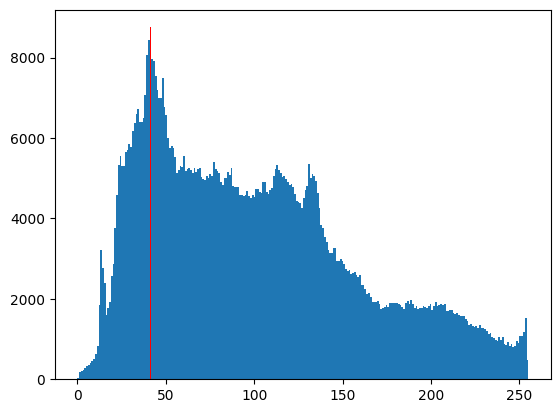

In [15]:
y, x, patches = plt.hist(im_byte.ravel(), bins=256)
max_freq = np.max(y)
max_freq_bin = np.argmax(y)
bin_left = x[max_freq_bin]
bin_right = x[max_freq_bin+1]

patches[max_freq_bin].set_facecolor('r')
print(f"Max frequency: {max_freq}")
print(f"Max frequency bin: {max_freq_bin}")
print(f"Bin left: {bin_left}")
print(f"Bin right: {bin_right}")

i